In [3]:
from pycaret.datasets import get_data
from pycaret.classification import *
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# get_data('index')

In [5]:
# binary classification
dataset_bin1 = get_data('titanic') # Survived
dataset_bin2 = get_data('nba') # TARGET_5Yrs
dataset_bin3 = get_data('wine') # type
dataset_bin4 = get_data('electrical_grid') # stabf
dataset_bin5 = get_data('employee') # left

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [6]:
hyper_search = {'n_estimators' : [50, 100, 200],
                'max_depth' : [None, 2, 4, 8, 16],
                        }

### Titanic

In [7]:
exp_bin1 = setup(data = dataset_bin1, target = 'Survived', session_id=123, verbose=False) 

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
PassengerId,ID Column
Pclass,Categorical
Name,Categorical
Sex,Categorical
Age,Numeric
SibSp,Categorical
Parch,Categorical
Ticket,Categorical
Fare,Numeric
Cabin,Categorical


In [9]:
best_model_bin1 = compare_models(['rf', 'gbc', 'xgboost', 'lightgbm'], n_select = 4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8154,0.8575,0.6923,0.8140,0.7470,0.6030,0.6091,0.1220
rf,Random Forest Classifier,0.7994,0.8653,0.6763,0.7829,0.7241,0.5681,0.5731,0.4900
lightgbm,Light Gradient Boosting Machine,0.7881,0.8487,0.6925,0.7540,0.7171,0.5489,0.5539,0.0360
xgboost,Extreme Gradient Boosting,0.7752,0.8407,0.6882,0.7360,0.7061,0.5250,0.5303,0.4930


In [10]:
rf = best_model_bin1[1]
gbm = best_model_bin1[0]
xgbm = best_model_bin1[3]
lgbm = best_model_bin1[2]

In [123]:
rf_result_bin1 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_rf = tune_model(rf, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        rf_result_bin1.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7360,0.8247,0.4490,0.7857,0.5714,0.4005,0.4333
1,0.7600,0.8067,0.5306,0.7879,0.6341,0.4655,0.4857
2,0.8000,0.8272,0.5918,0.8529,0.6988,0.5563,0.5771
3,0.7742,0.9254,0.5510,0.8182,0.6585,0.4993,0.5211
4,0.7984,0.8479,0.6250,0.8108,0.7059,0.5564,0.5673
Mean,0.7737,0.8464,0.5495,0.8111,0.6538,0.4956,0.5169
Std,0.0241,0.0416,0.0599,0.0244,0.0488,0.0589,0.0532


In [124]:
rf_result_bin1

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.7978,0.6196,0.6983,0.7464,0.7785
n_estimators : 100,0.8043,0.6132,0.6982,0.7432,0.7705
n_estimators : 200,0.8026,0.6131,0.6950,0.7544,0.7737


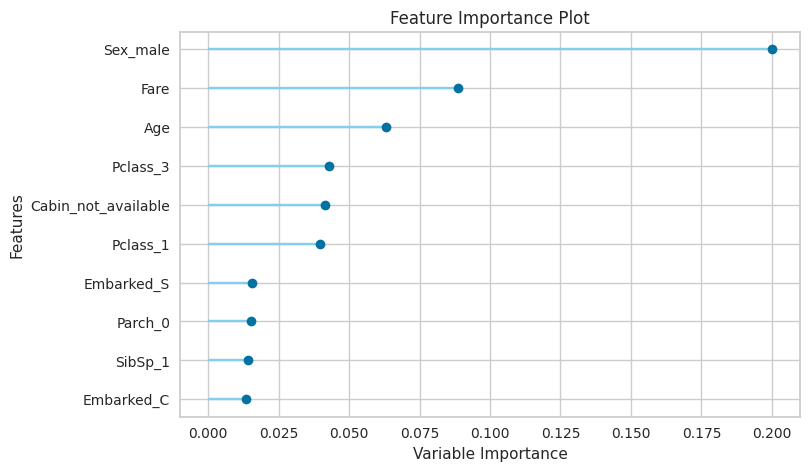

In [125]:
plot_model(tuned_rf, plot = 'feature')

In [126]:
gbm_result_bin1 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_gbm = tune_model(gbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        gbm_result_bin1.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8640,0.8609,0.7959,0.8478,0.8211,0.7116,0.7125
1,0.7760,0.8022,0.6939,0.7234,0.7083,0.5266,0.5269
2,0.8240,0.8358,0.6735,0.8462,0.7500,0.6169,0.6265
3,0.8629,0.9264,0.7755,0.8636,0.8172,0.7080,0.7107
4,0.8387,0.8606,0.7500,0.8182,0.7826,0.6548,0.6564
Mean,0.8331,0.8572,0.7378,0.8198,0.7758,0.6436,0.6466
Std,0.0323,0.0407,0.0469,0.0504,0.0425,0.0682,0.0682


In [127]:
gbm_result_bin1

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.8009,0.7962,0.8315,0.8315,0.8251
n_estimators : 100,0.8042,0.7978,0.8347,0.8363,0.8283
n_estimators : 200,0.8009,0.8059,0.8347,0.8396,0.8331


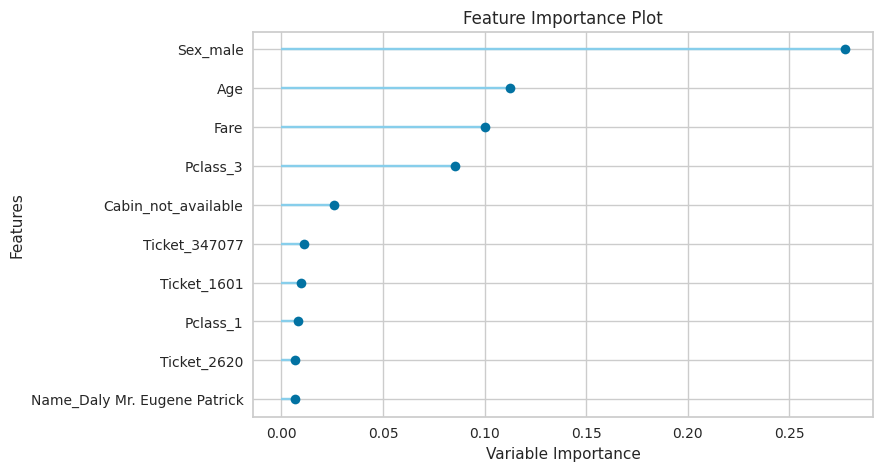

In [128]:
plot_model(tuned_gbm, plot = 'feature')

In [21]:
xgbm_result_bin1 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_xgbm = tune_model(xgbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        xgbm_result_bin1.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8160,0.8788,0.7959,0.7500,0.7723,0.6181,0.6189
1,0.7280,0.8234,0.6735,0.6471,0.6600,0.4335,0.4337
2,0.7600,0.8114,0.5714,0.7568,0.6512,0.4736,0.4845
3,0.7742,0.8356,0.7347,0.7059,0.7200,0.5309,0.5312
4,0.7500,0.8032,0.7083,0.6667,0.6869,0.4791,0.4797
Mean,0.7656,0.8305,0.6968,0.7053,0.6981,0.5071,0.5096
Std,0.0293,0.0265,0.0744,0.0437,0.0442,0.0636,0.0628


In [25]:
xgbm_result_bin1

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.7801,0.8155,0.8026,0.7833,0.7801
n_estimators : 100,0.7721,0.8074,0.7865,0.7672,0.7753
n_estimators : 200,0.7640,0.7994,0.7672,0.7592,0.7656


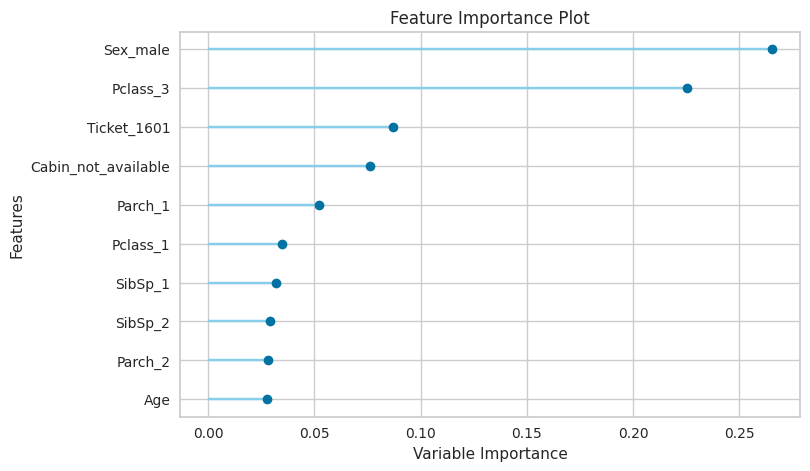

In [131]:
plot_model(tuned_xgbm, plot = 'feature')

In [132]:
lgbm_result_bin1 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_lgbm = tune_model(lgbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        lgbm_result_bin1.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8160,0.8778,0.7347,0.7826,0.7579,0.6097,0.6105
1,0.7520,0.8323,0.6939,0.6800,0.6869,0.4816,0.4817
2,0.7840,0.8396,0.5918,0.8056,0.6824,0.5244,0.5388
3,0.7661,0.8482,0.7347,0.6923,0.7129,0.5159,0.5165
4,0.7500,0.8098,0.6458,0.6889,0.6667,0.4670,0.4676
Mean,0.7736,0.8415,0.6802,0.7299,0.7013,0.5197,0.5230
Std,0.0244,0.0222,0.0550,0.0531,0.0319,0.0497,0.0505


In [133]:
lgbm_result_bin1

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.8106,0.8171,0.8122,0.8058,0.8106
n_estimators : 100,0.7881,0.8218,0.8058,0.7993,0.7897
n_estimators : 200,0.7752,0.8138,0.7961,0.7864,0.7736


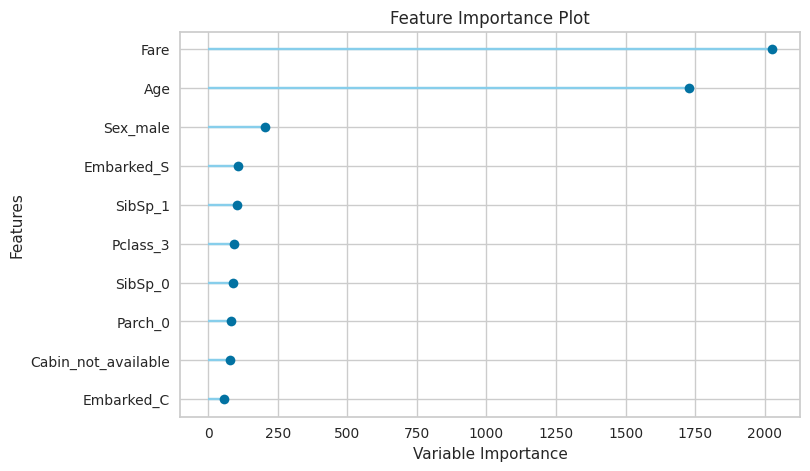

In [134]:
plot_model(tuned_lgbm, plot = 'feature')

### Nba

In [39]:
exp_bin2 = setup(data = dataset_bin2, target = 'TARGET_5Yrs', session_id=123, verbose=False) 

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Name,Categorical
GP,Numeric
MIN,Numeric
PTS,Numeric
FGM,Numeric
FGA,Numeric
FG%,Numeric
3P Made,Numeric
3PA,Numeric
3P%,Numeric


In [41]:
best_model_bin2 = compare_models(['rf', 'gbc', 'xgboost', 'lightgbm'], n_select = 4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6970,0.7465,0.8105,0.7374,0.7714,0.3243,0.3287,0.2380
rf,Random Forest Classifier,0.6927,0.7376,0.8036,0.7345,0.7668,0.3179,0.3224,0.1450
lightgbm,Light Gradient Boosting Machine,0.6884,0.7124,0.7936,0.7347,0.7619,0.3112,0.3155,0.0500
xgboost,Extreme Gradient Boosting,0.6552,0.6939,0.7580,0.7138,0.7343,0.2431,0.2459,0.9120


In [48]:
rf = best_model_bin2[1]
gbm = best_model_bin2[0]
xgbm = best_model_bin2[3]
lgbm = best_model_bin2[2]

In [49]:
rf_result_bin2 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_rf = tune_model(rf, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        rf_result_bin2.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7340,0.7934,0.8235,0.7717,0.7967,0.4133,0.4151
1,0.6383,0.7182,0.7881,0.6838,0.7323,0.1834,0.1879
2,0.7005,0.7031,0.7797,0.7541,0.7667,0.3491,0.3495
3,0.6898,0.7364,0.7712,0.7459,0.7583,0.3258,0.3262
4,0.7326,0.7876,0.8644,0.7500,0.8031,0.3929,0.4027
Mean,0.6991,0.7477,0.8054,0.7411,0.7714,0.3329,0.3363
Std,0.0350,0.0365,0.0345,0.0300,0.0260,0.0809,0.0811


In [50]:
rf_result_bin2

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.6969,0.6307,0.7012,0.7022,0.6958
n_estimators : 100,0.7065,0.6307,0.6884,0.7054,0.6958
n_estimators : 200,0.6937,0.6307,0.6841,0.7065,0.6991


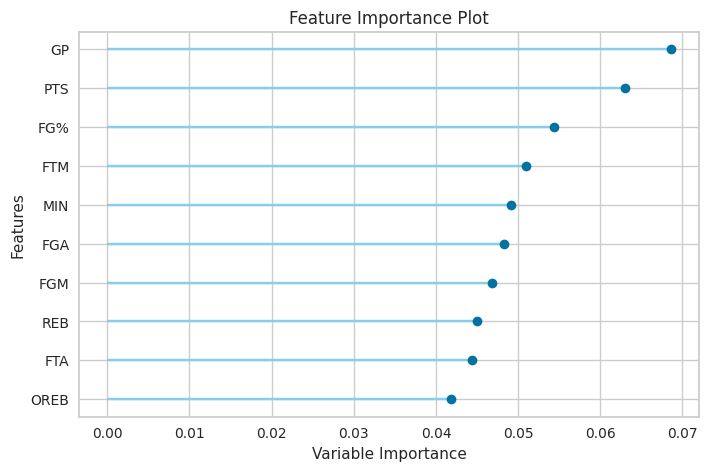

In [51]:
plot_model(tuned_rf, plot = 'feature')

In [52]:
gbm_result_bin2 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_gbm = tune_model(gbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        gbm_result_bin2.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7128,0.7210,0.7983,0.7600,0.7787,0.3703,0.3712
1,0.6383,0.6827,0.7373,0.7016,0.7190,0.2124,0.2129
2,0.7059,0.7179,0.7542,0.7739,0.7639,0.3740,0.3743
3,0.6364,0.6657,0.7542,0.6953,0.7236,0.1949,0.1963
4,0.6684,0.7087,0.7627,0.7258,0.7438,0.2749,0.2756
Mean,0.6724,0.6992,0.7614,0.7313,0.7458,0.2853,0.2861
Std,0.0323,0.0215,0.0202,0.0311,0.0229,0.0758,0.0756


In [53]:
gbm_result_bin2

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.6489,0.6969,0.6948,0.6841,0.6660
n_estimators : 100,0.6500,0.6991,0.6937,0.6820,0.6670
n_estimators : 200,0.6564,0.6937,0.6873,0.6884,0.6724


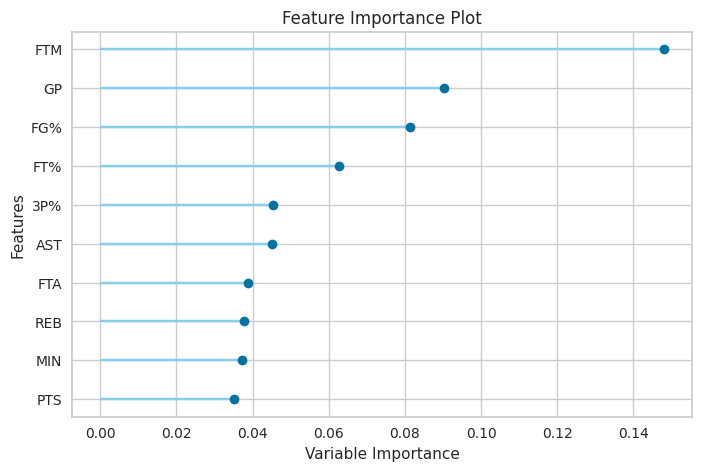

In [54]:
plot_model(tuned_gbm, plot = 'feature')

In [55]:
xgbm_result_bin2 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_xgbm = tune_model(xgbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        xgbm_result_bin2.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7234,0.7687,0.7815,0.7815,0.7815,0.4047,0.4047
1,0.6915,0.6667,0.8220,0.7239,0.7698,0.3078,0.3135
2,0.6524,0.7030,0.7373,0.7190,0.7280,0.2468,0.2469
3,0.6738,0.6930,0.8051,0.7143,0.7570,0.2664,0.2708
4,0.7005,0.7164,0.8305,0.7313,0.7778,0.3244,0.3306
Mean,0.6883,0.7095,0.7953,0.7340,0.7628,0.3100,0.3133
Std,0.0240,0.0338,0.0335,0.0244,0.0193,0.0549,0.0545


In [56]:
xgbm_result_bin2

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.6841,0.6649,0.6510,0.6702,0.6862
n_estimators : 100,0.6734,0.6670,0.6478,0.6819,0.6873
n_estimators : 200,0.6755,0.6521,0.6617,0.6809,0.6883


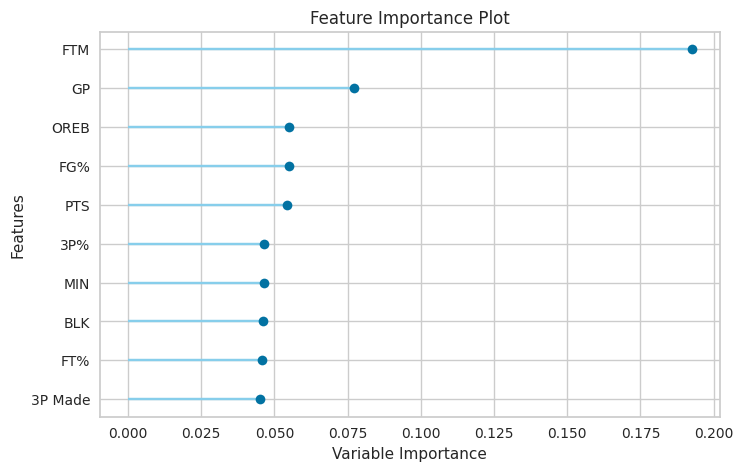

In [57]:
plot_model(tuned_xgbm, plot = 'feature')

In [58]:
lgbm_result_bin2 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_lgbm = tune_model(lgbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        lgbm_result_bin2.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7074,0.7635,0.7731,0.7667,0.7699,0.3684,0.3685
1,0.6596,0.6661,0.7627,0.7143,0.7377,0.2543,0.2555
2,0.6631,0.6995,0.7542,0.7236,0.7386,0.2655,0.2659
3,0.6471,0.6926,0.8051,0.6884,0.7422,0.1935,0.1996
4,0.6898,0.7119,0.8390,0.7174,0.7734,0.2913,0.3004
Mean,0.6734,0.7067,0.7868,0.7221,0.7524,0.2746,0.2780
Std,0.0220,0.0321,0.0313,0.0253,0.0159,0.0568,0.0557


In [59]:
lgbm_result_bin2

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.6852,0.7002,0.6842,0.6831,0.6809
n_estimators : 100,0.6862,0.6830,0.6703,0.6724,0.6820
n_estimators : 200,0.6670,0.6767,0.6628,0.6766,0.6734


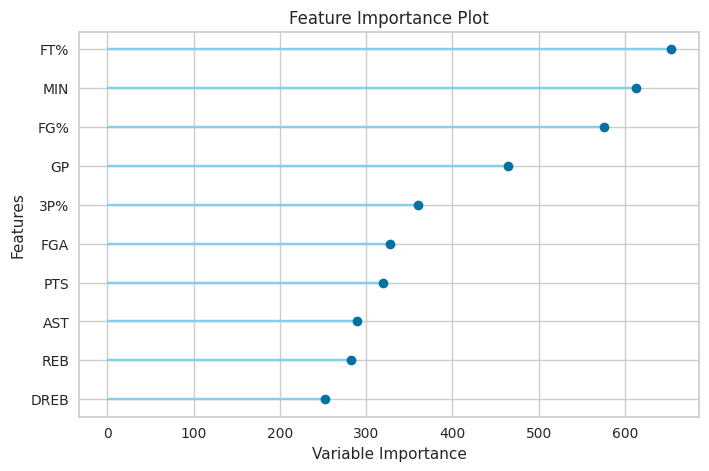

In [60]:
plot_model(tuned_lgbm, plot = 'feature')

### wine

In [61]:
exp_bin3 = setup(data = dataset_bin3, target = 'type', session_id=123, verbose=False) 

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
fixed acidity,Numeric
volatile acidity,Numeric
citric acid,Numeric
residual sugar,Numeric
chlorides,Numeric
free sulfur dioxide,Numeric
total sulfur dioxide,Numeric
density,Numeric
pH,Numeric
sulphates,Numeric


In [62]:
best_model_bin3 = compare_models(['rf', 'gbc', 'xgboost', 'lightgbm'], n_select = 4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9956,0.9969,0.9988,0.9954,0.9971,0.9880,0.9881,0.0390
xgboost,Extreme Gradient Boosting,0.9954,0.9977,0.9988,0.9951,0.9970,0.9874,0.9875,0.1010
rf,Random Forest Classifier,0.9943,0.9973,0.9974,0.9951,0.9962,0.9844,0.9845,0.1420
gbc,Gradient Boosting Classifier,0.9936,0.9971,0.9977,0.9939,0.9958,0.9826,0.9827,0.1610


In [63]:
rf = best_model_bin3[2]
gbm = best_model_bin3[3]
xgbm = best_model_bin3[1]
lgbm = best_model_bin3[0]

In [64]:
rf_result_bin3 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_rf = tune_model(rf, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        rf_result_bin3.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,0.9966,0.9985,0.9957,0.9971,0.9880,0.9881
1,0.9934,0.9956,0.9971,0.9942,0.9956,0.9821,0.9821
2,0.9956,1.0000,0.9985,0.9957,0.9971,0.9880,0.9880
3,0.9956,0.9999,1.0000,0.9942,0.9971,0.9880,0.9880
4,0.9956,0.9934,0.9985,0.9957,0.9971,0.9880,0.9880
Mean,0.9952,0.9971,0.9985,0.9951,0.9968,0.9868,0.9868
Std,0.0009,0.0025,0.0009,0.0007,0.0006,0.0024,0.0024


In [74]:
rf_result_bin3

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9949,0.9743,0.9903,0.9947,0.9949
n_estimators : 100,0.9952,0.9719,0.9897,0.9947,0.9952
n_estimators : 200,0.9952,0.9710,0.9905,0.9947,0.9952


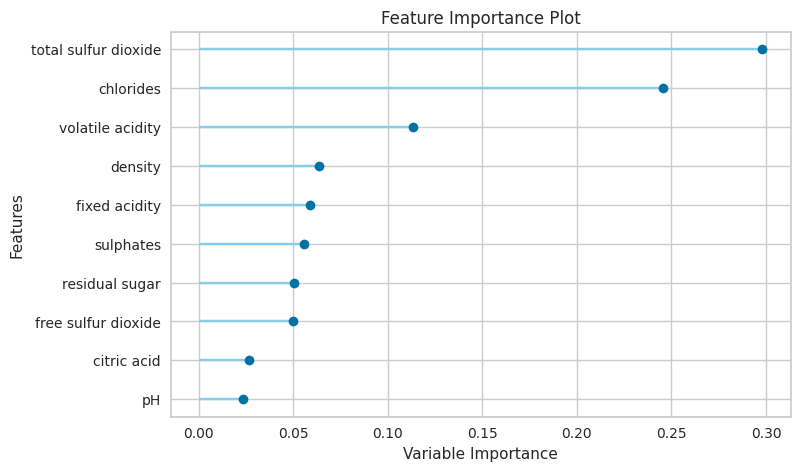

In [75]:
plot_model(tuned_rf, plot = 'feature')

In [65]:
gbm_result_bin3 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_gbm = tune_model(gbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        gbm_result_bin3.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9835,0.9896,0.9927,0.9856,0.9891,0.9550,0.9551
1,0.9791,0.9890,0.9855,0.9869,0.9862,0.9435,0.9435
2,0.9857,0.9981,0.9898,0.9913,0.9905,0.9612,0.9612
3,0.9923,0.9942,0.9971,0.9928,0.9949,0.9790,0.9790
4,0.9868,0.9862,0.9942,0.9884,0.9913,0.9639,0.9640
Mean,0.9855,0.9914,0.9919,0.9890,0.9904,0.9605,0.9606
Std,0.0043,0.0042,0.0040,0.0027,0.0029,0.0116,0.0116


In [66]:
gbm_result_bin3

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9848,0.9877,0.9919,0.9872,0.9855
n_estimators : 100,0.9853,0.9923,0.9932,0.9890,0.9855
n_estimators : 200,0.9861,0.9943,0.9945,0.9892,0.9855


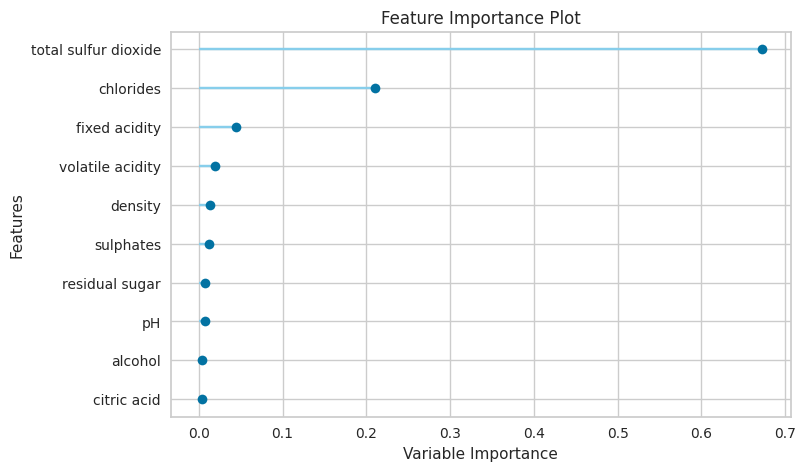

In [67]:
plot_model(tuned_gbm, plot = 'feature')

In [68]:
xgbm_result_bin3 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_xgbm = tune_model(xgbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        xgbm_result_bin3.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9967,0.9967,0.9985,0.9971,0.9978,0.9910,0.9911
1,0.9945,0.9972,0.9985,0.9942,0.9964,0.9850,0.9851
2,0.9989,1.0000,1.0000,0.9985,0.9993,0.9970,0.9970
3,0.9956,0.9999,1.0000,0.9942,0.9971,0.9880,0.9880
4,0.9945,0.9934,0.9985,0.9942,0.9964,0.9850,0.9850
Mean,0.9960,0.9974,0.9991,0.9957,0.9974,0.9892,0.9892
Std,0.0016,0.0024,0.0007,0.0018,0.0011,0.0045,0.0045


In [69]:
xgbm_result_bin3

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9956,0.9945,0.9956,0.9954,0.9956
n_estimators : 100,0.9960,0.9965,0.9960,0.9956,0.9958
n_estimators : 200,0.9965,0.9958,0.9960,0.9956,0.9960


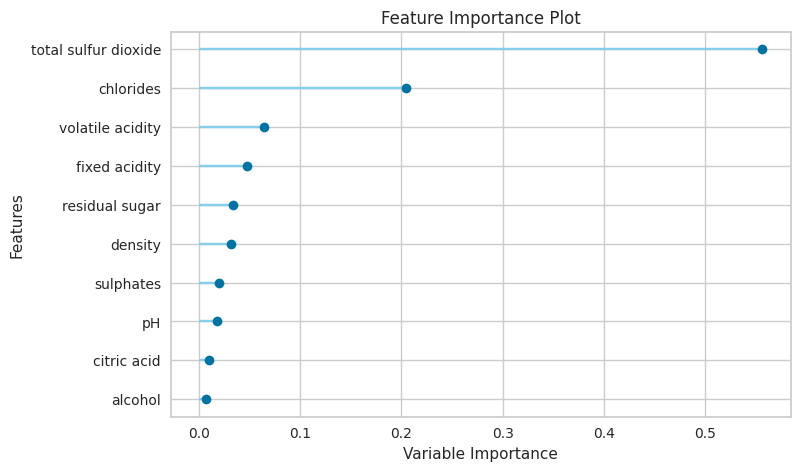

In [70]:
plot_model(tuned_xgbm, plot = 'feature')

In [71]:
lgbm_result_bin3 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_lgbm = tune_model(lgbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        lgbm_result_bin3.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,0.9964,0.9985,0.9957,0.9971,0.9880,0.9881
1,0.9945,0.9967,0.9971,0.9956,0.9964,0.9851,0.9851
2,0.9989,1.0000,1.0000,0.9985,0.9993,0.9970,0.9970
3,0.9967,0.9999,1.0000,0.9957,0.9978,0.9910,0.9910
4,0.9945,0.9921,0.9985,0.9942,0.9964,0.9850,0.9850
Mean,0.9960,0.9970,0.9988,0.9959,0.9974,0.9892,0.9892
Std,0.0016,0.0029,0.0011,0.0014,0.0011,0.0045,0.0045


In [72]:
lgbm_result_bin3

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9943,0.9908,0.9936,0.9941,0.9943
n_estimators : 100,0.9956,0.9936,0.9947,0.9949,0.9956
n_estimators : 200,0.9960,0.9956,0.9963,0.9956,0.9960


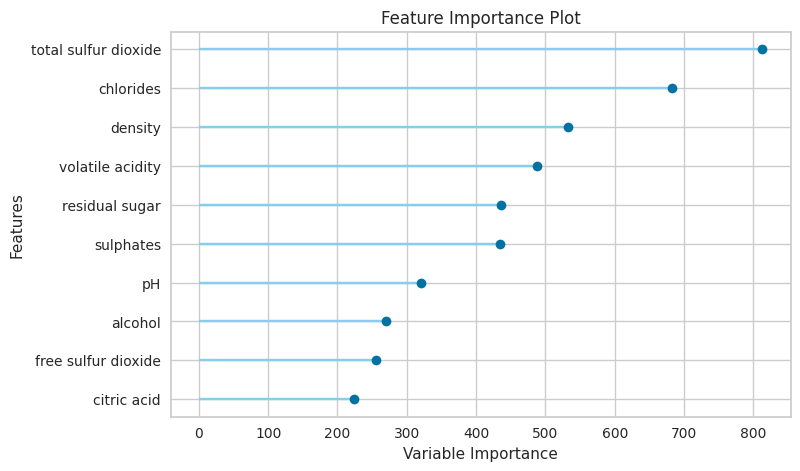

In [73]:
plot_model(tuned_lgbm, plot = 'feature')

### Electrical_grid

In [76]:
exp_bin4 = setup(data = dataset_bin4, target = 'stabf', session_id=123, verbose=False) 

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
tau1,Numeric
tau2,Numeric
tau3,Numeric
tau4,Numeric
p1,Numeric
p2,Numeric
p3,Numeric
p4,Numeric
g1,Numeric
g2,Numeric


In [77]:
best_model_bin4 = compare_models(['rf', 'gbc', 'xgboost', 'lightgbm'], n_select = 4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9427,0.9871,0.9662,0.9459,0.9559,0.8741,0.8745,0.0670
xgboost,Extreme Gradient Boosting,0.9424,0.9883,0.9656,0.9461,0.9557,0.8735,0.8740,0.4520
gbc,Gradient Boosting Classifier,0.9193,0.9767,0.9629,0.9160,0.9388,0.8204,0.8229,0.5330
rf,Random Forest Classifier,0.9171,0.9768,0.9536,0.9206,0.9367,0.8167,0.8181,0.2870


In [78]:
rf = best_model_bin4[3]
gbm = best_model_bin4[2]
xgbm = best_model_bin4[1]
lgbm = best_model_bin4[0]

In [79]:
rf_result_bin4 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_rf = tune_model(rf, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        rf_result_bin4.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9257,0.9801,0.9567,0.9299,0.9431,0.8362,0.8369
1,0.9107,0.9752,0.9611,0.9058,0.9326,0.8007,0.8038
2,0.9279,0.9832,0.9678,0.9236,0.9452,0.8398,0.8418
3,0.9079,0.9724,0.9489,0.9114,0.9298,0.7960,0.7973
4,0.9056,0.9743,0.9556,0.9034,0.9287,0.7895,0.7922
Mean,0.9156,0.9771,0.9580,0.9148,0.9359,0.8124,0.8144
Std,0.0093,0.0040,0.0063,0.0103,0.0069,0.0212,0.0207


In [80]:
rf_result_bin4

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9118,0.7080,0.8203,0.8961,0.9101
n_estimators : 100,0.9171,0.7084,0.8205,0.8956,0.9150
n_estimators : 200,0.9180,0.7088,0.8165,0.8998,0.9156


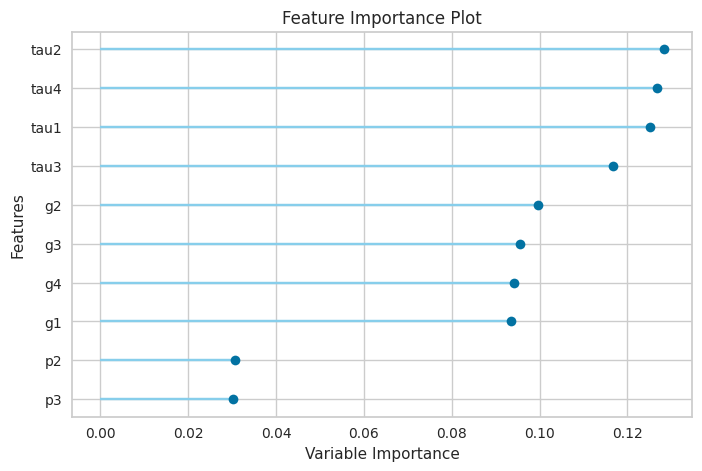

In [81]:
plot_model(tuned_rf, plot = 'feature')

In [82]:
gbm_result_bin4 = pd.DataFrame()    
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_gbm = tune_model(gbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        gbm_result_bin4.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8700,0.8842,0.8935,0.9035,0.8984,0.7179,0.7180
1,0.8243,0.8362,0.8789,0.8524,0.8654,0.6125,0.6131
2,0.8429,0.8487,0.8811,0.8753,0.8782,0.6569,0.6569
3,0.8286,0.8413,0.8678,0.8659,0.8668,0.6263,0.6263
4,0.8320,0.8654,0.8656,0.8723,0.8689,0.6351,0.6352
Mean,0.8395,0.8552,0.8774,0.8739,0.8756,0.6497,0.6499
Std,0.0164,0.0176,0.0101,0.0168,0.0123,0.0370,0.0369


In [83]:
gbm_result_bin4

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.8415,0.8713,0.9084,0.9150,0.8405
n_estimators : 100,0.8407,0.9011,0.9244,0.9201,0.8388
n_estimators : 200,0.8395,0.9190,0.9357,0.9247,0.8395


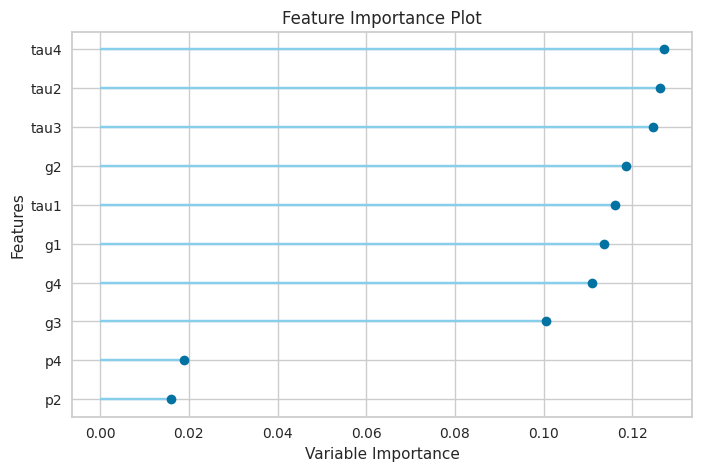

In [84]:
plot_model(tuned_gbm, plot = 'feature')

In [85]:
xgbm_result_bin4 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_xgbm = tune_model(xgbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        xgbm_result_bin4.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9464,0.9892,0.9656,0.9519,0.9587,0.8825,0.8827
1,0.9371,0.9855,0.9644,0.9394,0.9518,0.8616,0.8622
2,0.9493,0.9907,0.9622,0.9590,0.9606,0.8894,0.8894
3,0.9364,0.9857,0.9567,0.9451,0.9509,0.8609,0.8610
4,0.9357,0.9865,0.9622,0.9393,0.9506,0.8584,0.8589
Mean,0.9410,0.9875,0.9622,0.9469,0.9545,0.8706,0.8709
Std,0.0057,0.0021,0.0031,0.0076,0.0043,0.0128,0.0126


In [86]:
xgbm_result_bin4

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9348,0.9120,0.9313,0.9331,0.9337
n_estimators : 100,0.9407,0.9254,0.9381,0.9364,0.9383
n_estimators : 200,0.9450,0.9314,0.9431,0.9408,0.9410


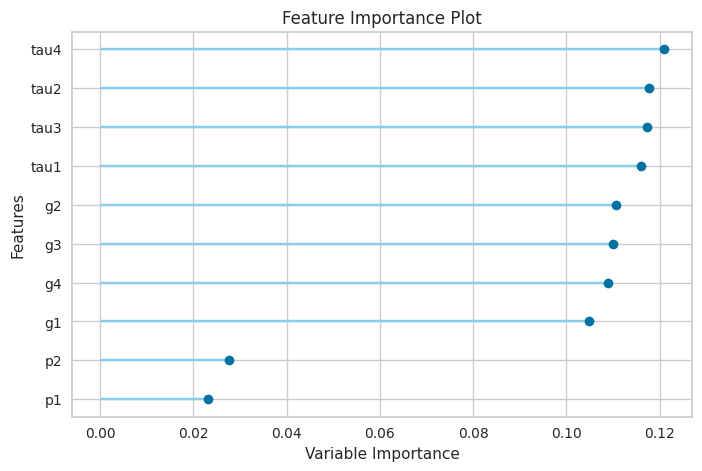

In [87]:
plot_model(tuned_xgbm, plot = 'feature')

In [88]:
lgbm_result_bin4 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_lgbm = tune_model(lgbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        lgbm_result_bin4.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9479,0.9904,0.9656,0.9539,0.9597,0.8858,0.8859
1,0.9386,0.9868,0.9667,0.9395,0.9529,0.8647,0.8654
2,0.9507,0.9899,0.9711,0.9531,0.9620,0.8918,0.8922
3,0.9379,0.9846,0.9556,0.9482,0.9519,0.8642,0.8643
4,0.9364,0.9872,0.9611,0.9412,0.9511,0.8602,0.8606
Mean,0.9423,0.9878,0.9640,0.9472,0.9555,0.8733,0.8737
Std,0.0058,0.0021,0.0053,0.0059,0.0045,0.0129,0.0128


In [89]:
lgbm_result_bin4

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9223,0.8721,0.9097,0.9247,0.9223
n_estimators : 100,0.9381,0.9038,0.9274,0.9386,0.9381
n_estimators : 200,0.9423,0.9208,0.9367,0.9436,0.9423


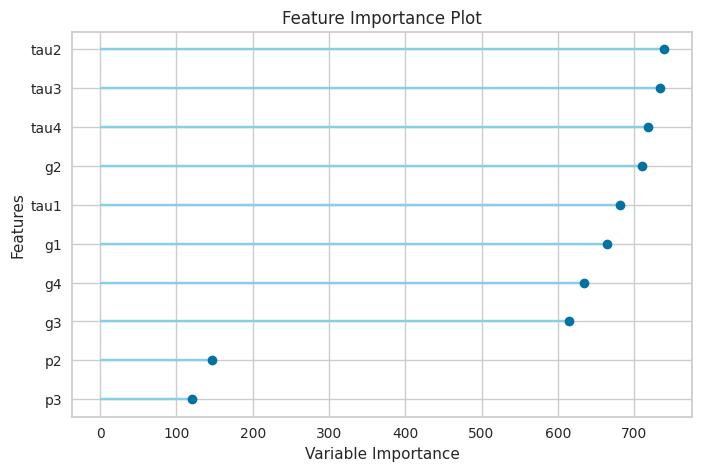

In [90]:
plot_model(tuned_lgbm, plot = 'feature')

### Employee

In [28]:
exp_bin5 = setup(data = dataset_bin5, target = 'left', session_id=123, verbose=False) 

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
satisfaction_level,Numeric
last_evaluation,Numeric
number_project,Categorical
average_montly_hours,Numeric
time_spend_company,Categorical
Work_accident,Categorical
promotion_last_5years,Categorical
department,Categorical
salary,Categorical
left,Label


In [30]:
best_model_bin5 = compare_models(['rf', 'gbc', 'xgboost', 'lightgbm'], n_select = 4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9888,0.9919,0.9612,0.9914,0.9760,0.9687,0.9689,0.5140
xgboost,Extreme Gradient Boosting,0.9869,0.9921,0.9604,0.9840,0.9720,0.9634,0.9636,0.3650
lightgbm,Light Gradient Boosting Machine,0.9859,0.9929,0.9536,0.9868,0.9698,0.9606,0.9609,0.0590
gbc,Gradient Boosting Classifier,0.9765,0.9882,0.9292,0.9708,0.9495,0.9342,0.9346,0.2610


In [31]:
rf = best_model_bin5[0]
gbm = best_model_bin5[3]
xgbm = best_model_bin5[1]
lgbm = best_model_bin5[2]

In [95]:
rf_result_bin5 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_rf = tune_model(rf, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        rf_result_bin5.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9862,0.9888,0.9540,0.9876,0.9705,0.9615,0.9617
1,0.9871,0.9941,0.9540,0.9917,0.9725,0.9641,0.9644
2,0.9881,0.9939,0.9560,0.9938,0.9745,0.9668,0.9671
3,0.9833,0.9853,0.9380,0.9915,0.9640,0.9532,0.9538
4,0.9867,0.9914,0.9480,0.9958,0.9713,0.9626,0.9631
Mean,0.9863,0.9907,0.9500,0.9921,0.9706,0.9616,0.9620
Std,0.0016,0.0033,0.0066,0.0027,0.0035,0.0046,0.0045


In [96]:
rf_result_bin5

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9877,0.7938,0.9396,0.9684,0.9850
n_estimators : 100,0.9878,0.8693,0.9160,0.9711,0.9855
n_estimators : 200,0.9880,0.8684,0.9159,0.9720,0.9863


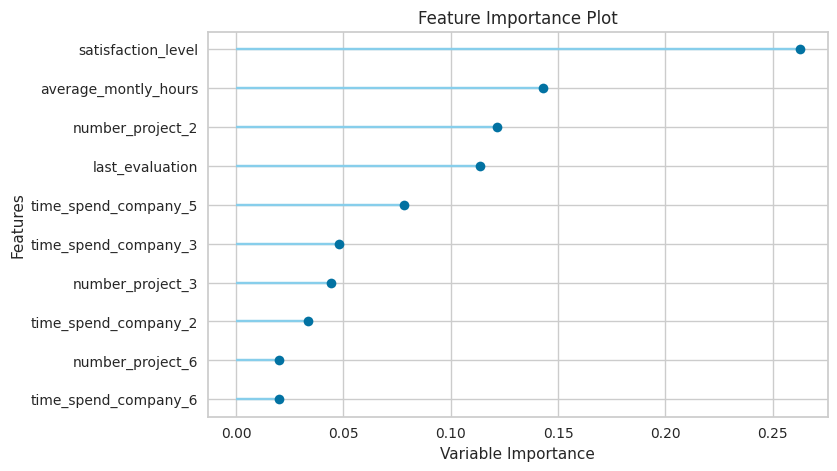

In [97]:
plot_model(tuned_rf, plot = 'feature')

In [98]:
gbm_result_bin5 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_gbm = tune_model(gbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        gbm_result_bin5.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9757,0.9763,0.9620,0.9376,0.9497,0.9337,0.9338
1,0.9743,0.9737,0.9700,0.9256,0.9473,0.9303,0.9307
2,0.9786,0.9672,0.9620,0.9487,0.9553,0.9412,0.9413
3,0.9733,0.9538,0.9240,0.9625,0.9429,0.9255,0.9258
4,0.9786,0.9710,0.9520,0.9577,0.9549,0.9408,0.9408
Mean,0.9761,0.9684,0.9540,0.9464,0.9500,0.9343,0.9345
Std,0.0022,0.0079,0.0160,0.0134,0.0047,0.0061,0.0059


In [99]:
gbm_result_bin5

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9766,0.9535,0.9777,0.9828,0.9772
n_estimators : 100,0.9759,0.9663,0.9796,0.9854,0.9771
n_estimators : 200,0.9756,0.9747,0.9818,0.9862,0.9761


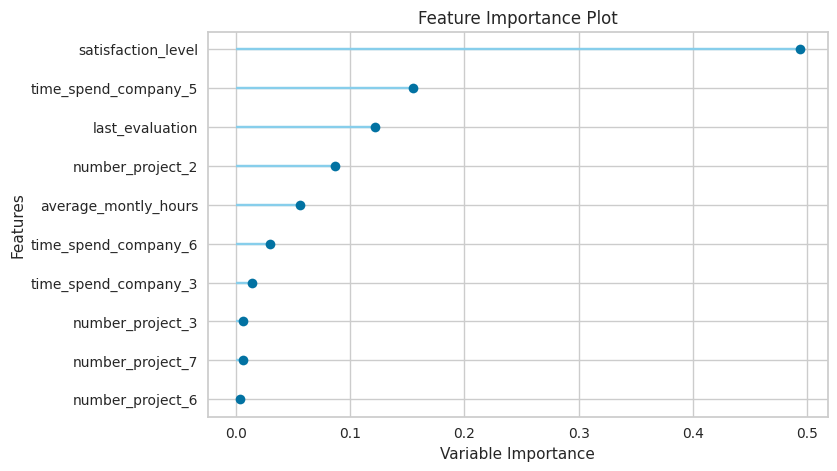

In [100]:
plot_model(tuned_gbm, plot = 'feature')

In [32]:
xgbm_result_bin5 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_xgbm = tune_model(xgbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        xgbm_result_bin5.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9852,0.9907,0.9620,0.9757,0.9688,0.9591,0.9592
1,0.9886,0.9947,0.9660,0.9857,0.9758,0.9683,0.9684
2,0.9867,0.9909,0.9620,0.9816,0.9717,0.9630,0.9631
3,0.9838,0.9843,0.9460,0.9854,0.9653,0.9548,0.9551
4,0.9871,0.9875,0.9580,0.9876,0.9726,0.9642,0.9644
Mean,0.9863,0.9896,0.9588,0.9832,0.9708,0.9619,0.9620
Std,0.0016,0.0035,0.0069,0.0042,0.0035,0.0046,0.0045


In [33]:
xgbm_result_bin5

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9827,0.9725,0.9786,0.9856,0.9867
n_estimators : 100,0.9857,0.9751,0.9820,0.9872,0.9867
n_estimators : 200,0.9864,0.9763,0.9846,0.9869,0.9863


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


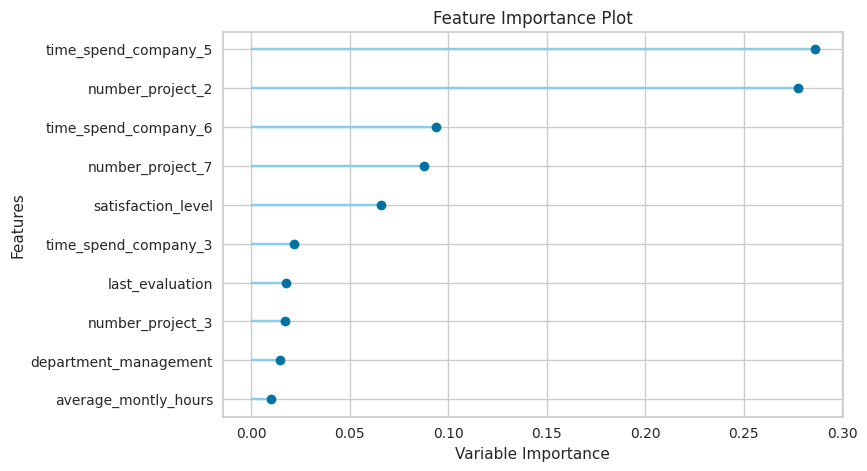

In [34]:
plot_model(tuned_xgbm, plot = 'feature')

In [104]:
lgbm_result_bin5 = pd.DataFrame()
for i in hyper_search['n_estimators']:
    for j in hyper_search['max_depth']:
        tuned_lgbm = tune_model(lgbm, custom_grid = {'n_estimators':[i], 'max_depth':[j]}, search_algorithm='grid', fold=5)
        lgbm_result_bin5.loc['n_estimators : {}'.format(i),'max_depth : {}'.format(j)] = pull()['Accuracy']['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9867,0.9920,0.9660,0.9777,0.9718,0.9631,0.9631
1,0.9900,0.9954,0.9700,0.9878,0.9788,0.9723,0.9723
2,0.9890,0.9925,0.9660,0.9877,0.9767,0.9696,0.9697
3,0.9857,0.9837,0.9460,0.9937,0.9693,0.9600,0.9605
4,0.9871,0.9885,0.9600,0.9856,0.9726,0.9642,0.9644
Mean,0.9877,0.9904,0.9616,0.9865,0.9739,0.9658,0.9660
Std,0.0016,0.0040,0.0084,0.0051,0.0035,0.0045,0.0044


In [105]:
lgbm_result_bin5

,max_depth : None,max_depth : 2,max_depth : 4,max_depth : 8,max_depth : 16
n_estimators : 50,0.9806,0.9533,0.9768,0.9806,0.9807
n_estimators : 100,0.9853,0.9642,0.9784,0.9830,0.9857
n_estimators : 200,0.9874,0.9749,0.9793,0.9870,0.9877


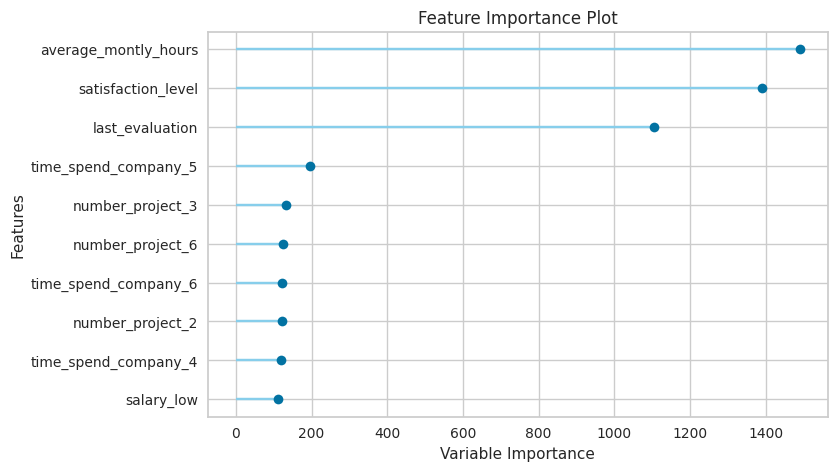

In [106]:
plot_model(tuned_lgbm, plot = 'feature')